We are using multi-class classification model using **MNIST** data. 
This dataset provides 70,000 hand-written digits, of which 60,000 are available to train and 10,000 to test.

In [1]:
# Import the dependencies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the MNIST dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, X_test.shape)
# There are 60,000 digits in X_train, with each digit represented as 2D array of 28*28

(60000, 28, 28) (10000, 28, 28)


In [4]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [5]:
# Take a look how one image looks like
X_train[0]
# Each image is represented in RGB format, ranging from 0(black) to 255(white)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

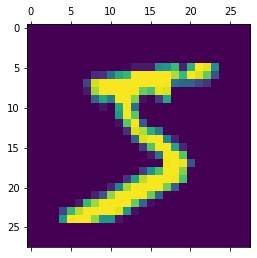

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
# Normalizing the values in dataset
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]
# Now each value lies between 0 and 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# Flattening the image to convert the shape from 3D to 2D
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
print(X_train_flattened.shape, X_test_flattened.shape)

(60000, 784) (10000, 784)


In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# Defining the model
model = tf.keras.Sequential([
tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.9067
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1437 - accuracy: 0.9577
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9700
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9764
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9816


In [15]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9744


[0.08204516023397446, 0.974399983882904]

Text(69.0, 0.5, 'Truth')

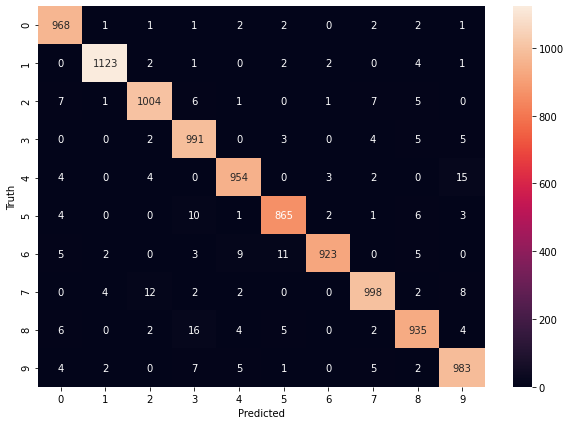

In [16]:
# Calculate the confusion matrix and visualize it
import seaborn as sn
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]
# The output is an array of 10 elements with probability corresponding to each digit

array([7.48987943e-02, 4.08166042e-03, 6.70552909e-01, 9.18697417e-01,
       1.07049616e-03, 1.19496547e-01, 1.30081953e-05, 9.99955654e-01,
       2.98214048e-01, 1.20755024e-01], dtype=float32)

In [18]:
# Find the element with maximum probablity
np.argmax(y_predicted[0]) 

7

In [19]:
print(y_test[0]) 
# Same as the predicted digit

7
